In [116]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [117]:
df = pd.read_csv("data/soil_type and season.csv")

In [81]:
df

,soil_type,date,season
0,"sand, clay",1997-10-08,Fall
1,clay,1999-01-01,Winter
2,"sand, clay, gravel",1999-01-01,Winter
3,clay,1999-01-04,Winter
4,"clay, gravel",1999-01-04,Winter
...,...,...,...
3399,sand/gravel,2019-05-12,Spring
3400,sand,2019-05-14,Spring
3401,clay,2019-05-16,Spring
3402,stone,2019-05-18,Spring


In [50]:
soil_dict = {"clay":0,"sand":0,"rock/stone":0,"mud/dirt":0,"gravel":0}
for i in range(len(df)):
    if "clay" in df.loc[i,"soil_type"]:
        soil_dict["clay"]+=1
    if "sand" in df.loc[i,"soil_type"]:
        soil_dict["sand"]+=1
    if "rock" in df.loc[i,"soil_type"] or "stone" in df.loc[i,"soil_type"]:
        soil_dict["rock/stone"]+=1
    if "mud" in df.loc[i,"soil_type"] or "dirt" in df.loc[i,"soil_type"]:
        soil_dict["mud/dirt"]+=1
    if "gravel" in df.loc[i,"soil_type"]:
        soil_dict["gravel"]+=1

In [51]:
soil_dict

{'clay': 2513, 'sand': 984, 'rock/stone': 626, 'mud/dirt': 128, 'gravel': 311}

In [54]:
pd.DataFrame.from_dict(soil_dict,orient = "index")

,0
clay,2513
sand,984
rock/stone,626
mud/dirt,128
gravel,311


In [55]:
soil_dict = {"clay":{"Spring":0,"Summer":0,"Fall":0,"Winter":0},
             "sand":{"Spring":0,"Summer":0,"Fall":0,"Winter":0},
             "rock/stone":{"Spring":0,"Summer":0,"Fall":0,"Winter":0},
             "mud/dirt":{"Spring":0,"Summer":0,"Fall":0,"Winter":0},
             "gravel":{"Spring":0,"Summer":0,"Fall":0,"Winter":0}}
for i in range(len(df)):
    if "clay" in df.loc[i,"soil_type"]:
        soil_dict["clay"][df.loc[i,"season"]]+=1
    if "sand" in df.loc[i,"soil_type"]:
        soil_dict["sand"][df.loc[i,"season"]]+=1
    if "rock" in df.loc[i,"soil_type"] or "stone" in df.loc[i,"soil_type"]:
        soil_dict["rock/stone"][df.loc[i,"season"]]+=1
    if "mud" in df.loc[i,"soil_type"] or "dirt" in df.loc[i,"soil_type"]:
        soil_dict["mud/dirt"][df.loc[i,"season"]]+=1
    if "gravel" in df.loc[i,"soil_type"]:
        soil_dict["gravel"][df.loc[i,"season"]]+=1

In [56]:
soil_dict

{'clay': {'Spring': 320, 'Summer': 228, 'Fall': 305, 'Winter': 1660},
 'sand': {'Spring': 159, 'Summer': 124, 'Fall': 165, 'Winter': 536},
 'rock/stone': {'Spring': 69, 'Summer': 46, 'Fall': 71, 'Winter': 440},
 'mud/dirt': {'Spring': 10, 'Summer': 12, 'Fall': 24, 'Winter': 82},
 'gravel': {'Spring': 66, 'Summer': 70, 'Fall': 67, 'Winter': 108}}

In [69]:
df = pd.DataFrame.from_dict(soil_dict,orient = "index")
df["sum"] = df["Spring"]+df["Summer"]+df["Fall"]+df["Winter"]
df = df.sort_values(by = "sum",ascending = False)
df["Spring_p"] = df["Spring"]/df["sum"]*100
df["Summer_p"] = df["Summer"]/df["sum"]*100
df["Fall_p"] = df["Fall"]/df["sum"]*100
df["Winter_p"] = df["Winter"]/df["sum"]*100
df

,Spring,Summer,Fall,Winter,sum,Spring_p,Summer_p,Fall_p,Winter_p
clay,320,228,305,1660,2513,12.733784,9.072821,12.136888,66.056506
sand,159,124,165,536,984,16.158537,12.601626,16.768293,54.471545
rock/stone,69,46,71,440,626,11.022364,7.348243,11.341853,70.287540
gravel,66,70,67,108,311,21.221865,22.508039,21.543408,34.726688
mud/dirt,10,12,24,82,128,7.812500,9.375000,18.750000,64.062500


In [76]:
new_df=df[["Winter_p","Spring_p","Summer_p","Fall_p"]]
new_df

,Winter_p,Spring_p,Summer_p,Fall_p
clay,66.056506,12.733784,9.072821,12.136888
sand,54.471545,16.158537,12.601626,16.768293
rock/stone,70.287540,11.022364,7.348243,11.341853
gravel,34.726688,21.221865,22.508039,21.543408
mud/dirt,64.062500,7.812500,9.375000,18.750000


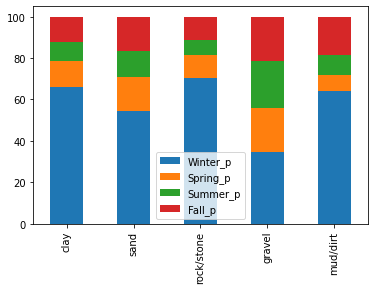

In [77]:
new_df.plot.bar(stacked = True)

In [118]:
soil_dict = {"Spring":{"clay":0,"sand":0,"rock/stone":0,"mud/dirt":0,"gravel":0},
            "Summer":{"clay":0,"sand":0,"rock/stone":0,"mud/dirt":0,"gravel":0},
            "Fall":{"clay":0,"sand":0,"rock/stone":0,"mud/dirt":0,"gravel":0},
            "Winter":{"clay":0,"sand":0,"rock/stone":0,"mud/dirt":0,"gravel":0},}
for i in range(len(df)):
    if "clay" in df.loc[i,"soil_type"]:
        soil_dict[df.loc[i,"season"]]["clay"]+=1
    if "sand" in df.loc[i,"soil_type"]:
        soil_dict[df.loc[i,"season"]]["sand"]+=1
    if "rock" in df.loc[i,"soil_type"] or "stone" in df.loc[i,"soil_type"]:
        soil_dict[df.loc[i,"season"]]["rock/stone"]+=1
    if "mud" in df.loc[i,"soil_type"] or "dirt" in df.loc[i,"soil_type"]:
        soil_dict[df.loc[i,"season"]]["mud/dirt"]+=1
    if "gravel" in df.loc[i,"soil_type"]:
        soil_dict[df.loc[i,"season"]]["gravel"]+=1

In [119]:
soil_dict

{'Spring': {'clay': 320,
  'sand': 159,
  'rock/stone': 69,
  'mud/dirt': 10,
  'gravel': 66},
 'Summer': {'clay': 228,
  'sand': 124,
  'rock/stone': 46,
  'mud/dirt': 12,
  'gravel': 70},
 'Fall': {'clay': 305,
  'sand': 165,
  'rock/stone': 71,
  'mud/dirt': 24,
  'gravel': 67},
 'Winter': {'clay': 1660,
  'sand': 536,
  'rock/stone': 440,
  'mud/dirt': 82,
  'gravel': 108}}

In [120]:
df = pd.DataFrame.from_dict(soil_dict,orient = "index")
df["sum"] = df["clay"]+df["sand"]+df["rock/stone"]+df["mud/dirt"]+df["gravel"]
df = df.sort_values(by = "sum",ascending = False)
df["clay_p"] = df["clay"]/df["sum"]*100
df["sand_p"] = df["sand"]/df["sum"]*100
df["rock/stone_p"] = df["rock/stone"]/df["sum"]*100
df["gravel_p"] = df["gravel"]/df["sum"]*100
df["mud/dirt_p"] = df["mud/dirt"]/df["sum"]*100
df

,clay,sand,rock/stone,mud/dirt,gravel,sum,clay_p,sand_p,rock/stone_p,gravel_p,mud/dirt_p
Winter,1660,536,440,82,108,2826,58.740269,18.966737,15.569710,3.821656,2.901628
Fall,305,165,71,24,67,632,48.259494,26.107595,11.234177,10.601266,3.797468
Spring,320,159,69,10,66,624,51.282051,25.480769,11.057692,10.576923,1.602564
Summer,228,124,46,12,70,480,47.500000,25.833333,9.583333,14.583333,2.500000


In [121]:
new_df=df[["clay_p","sand_p","rock/stone_p","gravel_p","mud/dirt_p"]]
new_df

,clay_p,sand_p,rock/stone_p,gravel_p,mud/dirt_p
Winter,58.740269,18.966737,15.569710,3.821656,2.901628
Fall,48.259494,26.107595,11.234177,10.601266,3.797468
Spring,51.282051,25.480769,11.057692,10.576923,1.602564
Summer,47.500000,25.833333,9.583333,14.583333,2.500000


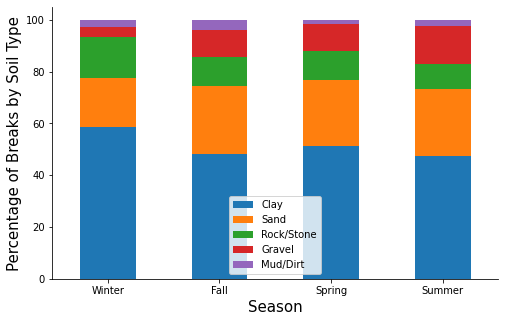

In [123]:
fig,ax = plt.subplots(figsize = (8,5))
new_df.plot.bar(stacked = True,ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation = 0)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Percentage of Breaks by Soil Type",fontsize = 15)
ax.legend(["Clay","Sand","Rock/Stone","Gravel","Mud/Dirt"],loc = "lower center")
plt.savefig("Percentage of Breaks by Season.pdf")